### Imports and loading data

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [55]:
dataset_1 = pd.read_csv("../raw_data/dataset_1.csv")

### Inspecting data

### Dropping redundant columns

In [56]:
dataset_1 = dataset_1[['Negative_Review', 'Positive_Review', 'Reviewer_Score']]

### Cleaning and merging negative and positive reviews

In [57]:
dataset_1[['Negative_Review']] = dataset_1[['Negative_Review']].replace(to_replace="No Negative", value="")

dataset_1[['Positive_Review']] = dataset_1[['Positive_Review']].replace(to_replace="No Positive", value="")

dataset_1["Review_Text"] = dataset_1['Negative_Review'] + " " + dataset_1['Positive_Review']

dataset_1 = dataset_1.drop(columns=['Negative_Review', 'Positive_Review'])

### Lower case

In [58]:
dataset_1['Review_Text'] = dataset_1['Review_Text'].apply(lambda x: x.lower())

### Remove numbers

In [59]:
def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text

dataset_1['Review_Text'] = dataset_1['Review_Text'].apply(remove_numbers)

### Remove punctuation

In [60]:
for punctuation in string.punctuation:
    dataset_1['Review_Text'] = dataset_1['Review_Text'].replace(punctuation, '') 

### Remove stopwords

In [61]:
def custom_stopwords():
    """create custom stopwords list excluding negative words"""
    negative_words = ['no',
    'nor',
    'not',
    "don't",
    'should',
    "should've",
    'aren',
    "aren't",
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'isn',
    "isn't",
    "wasn't",
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't"]
    custom_stopwords = [x for x in stopwords.words('english') if x not in negative_words]
    return custom_stopwords

custom_stopwords = custom_stopwords()

In [63]:
# custom_stopwords 

In [64]:
stop_words = custom_stopwords
dataset_1['reviews'] = dataset_1['Review_Text'].map(word_tokenize)
dataset_1['reviews'] = dataset_1['reviews'].map(lambda x: [w for w in x if not w in stop_words])

### Lemmatizing

In [65]:
lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    text = lemmatized
    text = ' '.join(word for word in text)
    return text

dataset_1['reviews'] = dataset_1['reviews'].apply(lemmatizing)

### Custom scaling and rounding

In [66]:
dataset_1['review_score'] = dataset_1['Reviewer_Score'] # / 10

dataset_1 = dataset_1.drop(columns=['Review_Text', 'Reviewer_Score'])

dataset_1['review_score'] = dataset_1['review_score'].round(decimals=2)

In [67]:
#Final check
dataset_1

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
515733,no trolly staff help take luggage room location,7.0
515734,hotel look like surely not breakfast ok got ea...,5.8
515735,ac useless hot week vienna gave hot air,2.5
515736,room enormous really comfortable believe famil...,8.8


### Exporting to csv

In [14]:
#dataset_1.to_csv('../raw_data/clean_dataset_1.csv')

------------------------------------- NEW FILE --------------------------

In [68]:
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize

# Import CSV

In [69]:
#data = pd.read_csv("../raw_data/clean_dataset_1.csv", index_col=0)
data = dataset_1
data

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
515733,no trolly staff help take luggage room location,7.0
515734,hotel look like surely not breakfast ok got ea...,5.8
515735,ac useless hot week vienna gave hot air,2.5
515736,room enormous really comfortable believe famil...,8.8


# Remove less than 10 words (To Do)

In [70]:
data['length'] = data['reviews'].apply(lambda x: len(word_tokenize(str(x))))
data.drop(data[data['length'] < 11].index, inplace=True)
data.drop(columns=['length'], inplace=True)
data.reset_index(drop=True, inplace=True)
data

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
306040,noisy night air causing loud banging heating p...,6.3
306041,put fotos cinde room see booking location give...,5.4
306042,wifi location no tea coffee room rather cheap ...,5.8
306043,breakfast excelent lot fress fruit hotel good ...,10.0


### DROPS w/Regular Stopwords: 299740 / No Stopwords: 386133  / Custom Stopwords: 306045

In [71]:
data.shape

(306045, 2)

## RMSE SCORER

In [191]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error

def rmse_function(y_test, y_train):
    return np.sqrt(mean_squared_error(y_test, y_train))

rmse_scorer = make_scorer(rmse_function)

# def rmsle_neg_func(y_test, y_train):
#     return np.sqrt(mean_squared_log_error(y_test, y_train)) * (-1)

# rmsle_neg = make_scorer(rmsle_neg_func)

# Vectorizer: Tf-Idf - Model: LinearRegression (max_features=50)

# Vectorizer: Tf-Idf - Model: LinearRegression (max_features=200)

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(max_features=200)

In [230]:
X = tf_idf_vectorizer.fit_transform(data['reviews'][:10000])
y = data['review_score'][:10000]
X.shape, y.shape

((10000, 200), (10000,))

# PCA

In [231]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

# find all Principal Components PC (no y!)
pca.fit(X.toarray())
Xpca = pca.transform(X.toarray()) 
Xpca

array([[-2.51290151e-01, -3.24090130e-01,  1.81929055e-03, ...,
         9.19324078e-02, -3.61586198e-02,  4.13647663e-02],
       [ 1.66408161e-01,  8.93624619e-04, -2.55790218e-02, ...,
         8.99740562e-02,  9.35076398e-03,  4.53786455e-03],
       [-7.34292769e-02,  9.09895019e-02,  9.51373927e-02, ...,
        -9.57161406e-03, -1.74688336e-02,  2.69814213e-02],
       ...,
       [-2.07937037e-01, -1.69306976e-01, -1.05956108e-01, ...,
        -7.68668913e-02, -4.87109834e-02,  6.93136864e-02],
       [ 2.60088040e-01,  1.43347067e-01, -2.86905998e-01, ...,
         2.80225244e-02, -5.63982668e-03,  3.41155589e-02],
       [ 9.80867641e-03, -8.31205055e-02,  3.12924729e-02, ...,
         2.21464583e-02, -1.57925795e-02,  1.77694834e-04]])

In [232]:
Xpca.shape

(10000, 100)

# NMF ??

In [212]:
from sklearn.decomposition import NMF

# Put The PCA Here ???? or the normal X ????

model = NMF(n_components=50, init='random', random_state=0)
Xnmf = model.fit_transform(X.toarray())
H = model.components_

In [213]:
Xnmf

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.04967046e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.14926766e-01, ...,
        0.00000000e+00, 1.54747720e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.02740483e-01, ...,
        0.00000000e+00, 1.25916381e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.48372721e-03, 0.00000000e+00, 5.03469394e-03],
       [1.28604842e+00, 0.00000000e+00, 7.81728065e-01, ...,
        0.00000000e+00, 1.73897035e-01, 1.12296155e-03],
       [9.02422482e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.86175816e-01, 1.06554040e-01, 0.00000000e+00]])

In [215]:
Xnmf.shape

(10000, 50)

# Hold out 

In [234]:
from sklearn.model_selection import train_test_split

# Hold out 
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.2)

#check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 100), (2000, 100), (8000,), (2000,))

#  Vectorizer: Tf-Idf (max_features=200) - Model: LinearRegression

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate

model = LinearRegression()
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

'R2: 0.35085300399160485  RMSE: 1.429289393763272'

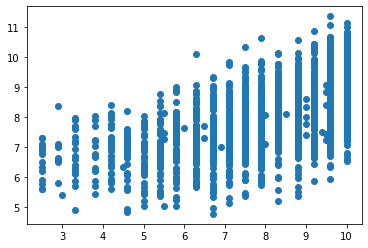

In [236]:
import matplotlib.pyplot as plt 
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)

# Vectorizer: Tf-Idf (max_features=200) - Model: Lasso

# Vectorizer: Tf-Idf - Model: Random Forest

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

'R2: 0.3047270592839843  RMSE: 0.18678120288893033'

# Vectorizer: Tf-Idf - Model: KNN

In [218]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

'R2: 0.08500387238139655  RMSE: 1.6858628087609033'

# Vectorizer: Tf-Idf - SVM - Linear (0.37)

#### Version 1

In [237]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

'R2: 0.33599881630252904  RMSE: 1.446643877119312'

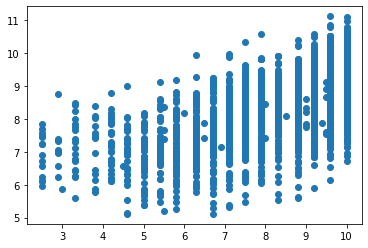

In [238]:
import matplotlib.pyplot as plt 
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)

In [87]:
model = SVR(kernel='linear', gamma=0.001, C=0.1)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.30385071418473253

In [84]:
model = SVR(kernel='linear', gamma=3, C=10)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.36068800865523204

In [85]:
model = SVR(kernel='linear', gamma=0.01, C=10)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.36068800865523204

In [86]:
model = SVR(kernel='linear', gamma=0.01, C=1)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.38295458639891194

In [88]:
model = SVR(kernel='linear', gamma=0.001, C=1)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.38295458639891194

#### Version 2

In [89]:
model = SVR(kernel='poly')
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.28554151262991323

### Version 3

In [239]:
model = SVR(kernel='rbf')
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

'R2: 0.34469697737295996  RMSE: 1.4372222801600443'

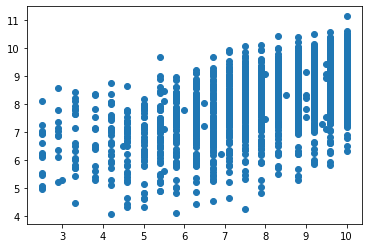

In [240]:
import matplotlib.pyplot as plt 
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)

In [91]:
model = SVR(kernel='rbf', gamma=0.15, C=20)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.38082171795040104

In [93]:
model = SVR(kernel='rbf', gamma=1, C=1)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.38672415379815905

### Version 4

In [94]:
model = SVR(kernel='sigmoid')
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.36714457061801686

### Version 5 - SVR(kernel='linear') - RandomSearch

### Version 6 - SVR(kernel='rbf') - RandomSearch 

#  20.000 DataPoints and max_features=500

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(max_features=500)

X = tf_idf_vectorizer.fit_transform(data['reviews'][:20000])
y = data['review_score'][:20000]

from sklearn.model_selection import train_test_split

# Hold out 
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names()), y, test_size=0.2)

#check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 500), (4000, 500), (16000,), (4000,))

#### Model: LinearRegression 

In [96]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.4078666027919796

#### Model: Random Forest  

In [97]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.35126847940401723

#### Model: SVM - Linear

In [98]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

0.41798028913534535

#### Model: SVM - rbf

In [133]:
model = SVR(kernel='rbf')
model.fit(X_train,y_train)

custom_scorer = {'r2': 'r2',
                 'rmse_scorer': rmse_scorer,
                 }

result = cross_validate(model,X_test,y_test, scoring=custom_scorer)

f"R2: {result['test_r2'].mean()}  RMSE: {result['test_rmse_scorer'].mean()}"

'R2: 0.39870656998793724  RMSE: 0.17066079681784124'

# Export

In [ ]:
# import pickle

# # Export pipeline as pickle file
# with open("pipeline.pkl", "wb") as file:
#     pickle.dump(best_pipeline, file)